# Projeto german credit risk

In [20]:
import requests
import logging
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from pathlib import Path

In [2]:
DATA_DIR = Path.cwd().parent / 'data'

In [3]:
DATA_DIR

WindowsPath('c:/Users/felip/OneDrive/Documentos/GitHub/german/data')

In [4]:
def load_data(data_dir: Path):
    pickle_file_path = data_dir / 'data.pkl'
    if not pickle_file_path.exists():
        data_dir.mkdir(parents=True, exist_ok=True)

        url = 'https://archive.ics.uci.edu/static/public/144/statlog+german+credit+data.zip'
        response = requests.get(url)
        if response.status_code != 200:
            logging.info('Failed to download dataset.')
            return None

        file_path = data_dir / 'data.zip'
        with open(file_path, 'wb') as file:
            file.write(response.content)
        logging.info('Dataset downloaded successfully.')

        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(path=data_dir)

        columns = [
            'status',
            'duration',
            'history',
            'purpose',
            'amount',
            'savings',
            'employment',
            'installment',
            'status_sex',
            'guarantors',
            'residence',
            'property_type',
            'age',
            'plans',
            'housing',
            'credits',
            'job',
            'dependents',
            'telephone',
            'foreign',
            'target',
        ]
        data = pd.read_csv(
            data_dir / 'german.data',
            sep=' ', 
            header=None, 
            names=columns,
        )

        data.to_pickle(pickle_file_path)
    else:
        data = pd.read_pickle(pickle_file_path)

    return data

In [6]:
data = load_data(DATA_DIR)

In [7]:
data.head()

,status,duration,history,purpose,amount,savings,employment,installment,status_sex,guarantors,...,property_type,age,plans,housing,credits,job,dependents,telephone,foreign,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status         1000 non-null   object
 1   duration       1000 non-null   int64 
 2   history        1000 non-null   object
 3   purpose        1000 non-null   object
 4   amount         1000 non-null   int64 
 5   savings        1000 non-null   object
 6   employment     1000 non-null   object
 7   installment    1000 non-null   int64 
 8   status_sex     1000 non-null   object
 9   guarantors     1000 non-null   object
 10  residence      1000 non-null   int64 
 11  property_type  1000 non-null   object
 12  age            1000 non-null   int64 
 13  plans          1000 non-null   object
 14  housing        1000 non-null   object
 15  credits        1000 non-null   int64 
 16  job            1000 non-null   object
 17  dependents     1000 non-null   int64 
 18  telephone      1000 non-null 

In [9]:
data.describe()

,duration,amount,installment,residence,age,credits,dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


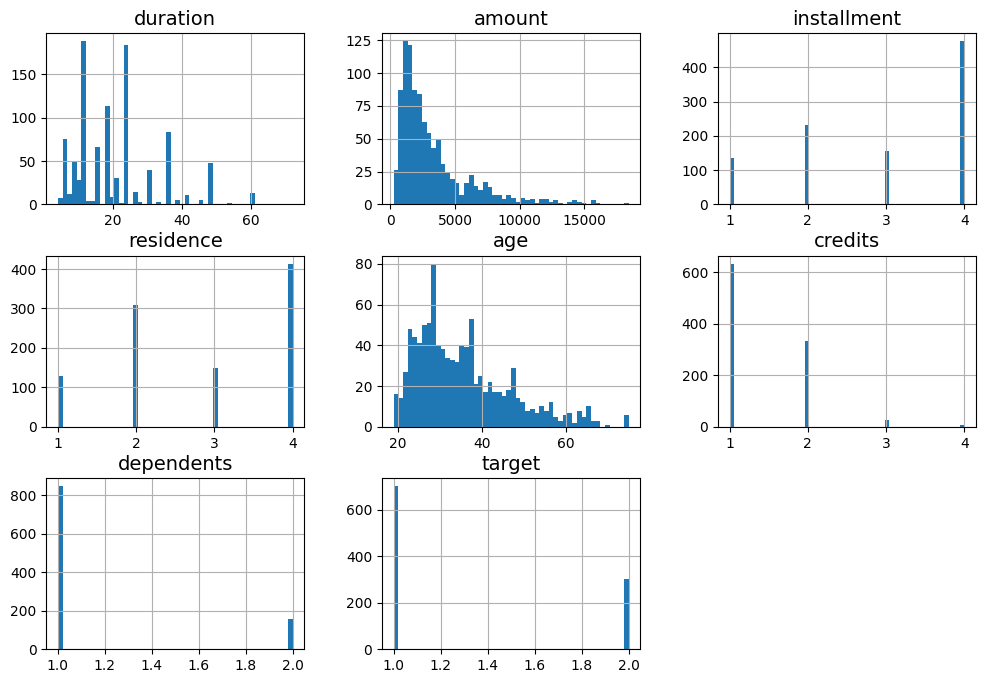

In [12]:
data.hist(bins=50, figsize=(12, 8))
plt.show()

In [28]:
data['target'].value_counts()

1    700
2    300
Name: target, dtype: int64

In [31]:
cat_cols = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column        value        
employment    A71        62
              A72       172
              A74       174
              A75       253
              A73       339
foreign       A202       37
              A201      963
guarantors    A102       41
              A103       52
              A101      907
history       A30        40
              A31        49
              A33        88
              A34       293
              A32       530
housing       A153      108
              A151      179
              A152      713
job           A171       22
              A174      148
              A172      200
              A173      630
plans         A142       47
              A141      139
              A143      814
property_type A124      154
              A122      232
              A121      282
              A123      332
purpose       A48         9
              A44        12
              A410       12
              A45        22
              A46        50
              A49        97
              A41       103
              A42       181
              A40       234
              A43       280
savings       A64        48
              A63        63
              A62       103
              A65       183
              A61       603
status        A13        63
              A12       269
              A11       274
              A14       394
status_sex    A91        50
              A94        92
              A92       310
              A93       548
telephone     A192      404
              A191      596

### Preparação/encoding dos dados

Atributos numéricos: duration, amount, age, installment, residence, credits, dependents

Atributos categóricos ordinais: status, history, savings, employment, job, telephone, foreign

Atributos categóricos nominais: purpose, status_sex, guarantors, property_type, plans, housing

In [18]:
data_encoded = data.copy()

In [19]:
ordinal_encoder = OrdinalEncoder()

data_encoded['status'] = ordinal_encoder.fit_transform(data_encoded[['status']])
data_encoded['history'] = ordinal_encoder.fit_transform(data_encoded[['history']])
data_encoded['savings'] = ordinal_encoder.fit_transform(data_encoded[['savings']])
data_encoded['employment'] = ordinal_encoder.fit_transform(data_encoded[['employment']])
data_encoded['job'] = ordinal_encoder.fit_transform(data_encoded[['job']])
data_encoded['telephone'] = ordinal_encoder.fit_transform(data_encoded[['telephone']])
data_encoded['foreign'] = ordinal_encoder.fit_transform(data_encoded[['foreign']])

In [23]:
def one_hot_encode_and_substitute(column, original_df):
    encoder = OneHotEncoder(categories='auto')
    encoded = encoder.fit_transform(data_encoded[[column]]).toarray()
    encoded_df = pd.DataFrame(encoded, columns=[f'{column}_{i}' for i in range(len(encoded[0]))])
    return pd.concat([original_df, encoded_df], axis=1).drop(columns=[column])

for column in ['purpose', 'status_sex', 'guarantors', 'property_type', 'plans', 'housing']:
    data_encoded = one_hot_encode_and_substitute(column, data_encoded)

In [24]:
data_encoded.head()

,status,duration,history,amount,savings,employment,installment,residence,age,credits,...,property_type_0,property_type_1,property_type_2,property_type_3,plans_0,plans_1,plans_2,housing_0,housing_1,housing_2
0,0.0,6,4.0,1169,4.0,4.0,4,4,67,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,48,2.0,5951,0.0,2.0,2,2,22,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.0,12,4.0,2096,0.0,3.0,2,3,49,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,42,2.0,7882,0.0,3.0,2,4,45,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,24,3.0,4870,0.0,2.0,3,4,53,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
